# Contents List
## 01. importing libraries
## 02. bar charts
## 03. exporting charts
## 04. histogram and scatterplot creation
## 05. sampling

# 01. importing libraries

In [18]:
path=r'C:\Users\paperspace\Desktop\01 Project Folders\12-2021 Instacart Basket Analysis'

In [3]:
conda install seaborn matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_4.8.csv'))

# 02. bar charts

<AxesSubplot:>

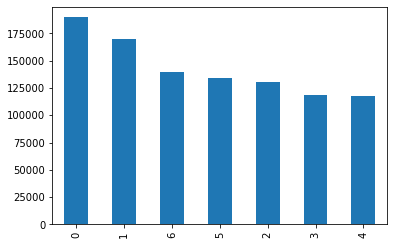

In [11]:
df['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

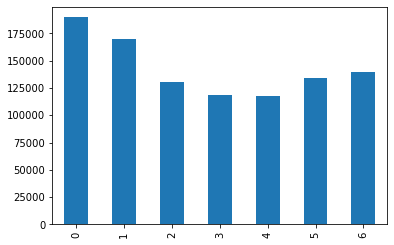

In [12]:
df['order_dow'].value_counts().sort_index().plot.bar()

In [14]:
df['order_dow'].value_counts(dropna=False).sort_index()

0    189682
1    169919
2    130570
3    118355
4    117895
5    133973
6    139606
Name: order_dow, dtype: int64

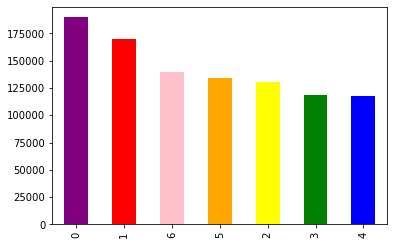

In [15]:
bar = df['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

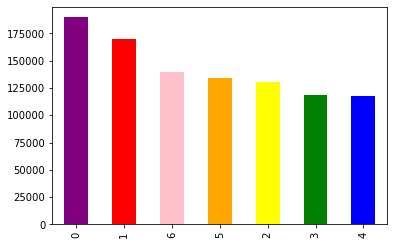

In [16]:
bar.figure

# 03. exporting charts

In [19]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 04. histograms and scatterplots

<AxesSubplot:ylabel='Frequency'>

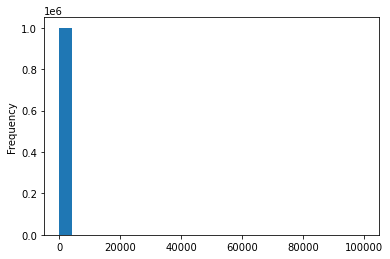

In [20]:
df['prices'].plot.hist(bins = 25)

In [21]:
df['prices'].mean()

11.401582604457541

In [22]:
df['prices'].median()

7.4

In [23]:
df['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

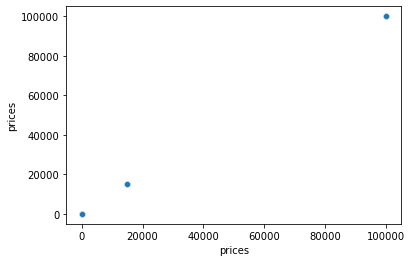

In [24]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [25]:
#looking for outliers
df.loc[df['prices'] > 100]

Unnamed: 0  Unnamed: 0.1  order_id  user_id eval_set  order_number  \
1576          1576          1576    912404       17    prior            12   
1638          1638          1638    603376       17    prior            22   
16534        16534         16534   3264360      135    prior             2   
16540        16540         16540    892534      135    prior             3   
53714        53714         53714    229704      342    prior             8   
...            ...           ...       ...      ...      ...           ...   
959943      959943        959943    840159     6217    prior            13   
959989      959989        959989   1235750     6217    prior            20   
961243      961243        961243     40712     6221    prior             5   
961317      961317        961317   2567369     6221    prior            10   
961478      961478        961478    842052     6222    prior            10   

        order_dow  order_hour_of_day  days_since_prior_order  product_id  ...  \
1576            2                 14                     5.0       21553  ...   
1638            6                 16                     4.0       21553  ...   
16534           2                 21                    13.0       21553  ...   
16540           0                  8                    12.0       21553  ...   
53714           1                 19                    30.0       21553  ...   
...           ...                ...                     ...         ...  ...   
959943          1                 11                    15.0       21553  ...   
959989          5                  9                    11.0       21553  ...   
961243          0                 15                     8.0       21553  ...   
961317          2                 17                    17.0       21553  ...   
961478          1                 18                    17.0       33664  ...   

         prices         price_range  busiest_days  busiest_period_of_day  \
1576    14900.0  High-range product  regular_days         average orders   
1638    14900.0  High-range product  regular_days         average orders   
16534   14900.0  High-range product  regular_days         average orders   
16540   14900.0  High-range product  busiest_days         average orders   
53714   14900.0  High-range product  busiest_days         average orders   
...         ...                 ...           ...                    ...   
959943  14900.0  High-range product  busiest_days         average orders   
959989  14900.0  High-range product  regular_days         average orders   
961243  14900.0  High-range product  busiest_days         average orders   
961317  14900.0  High-range product  regular_days         average orders   
961478  99999.0  High-range product  busiest_days         average orders   

       max_order      loyalty_flag  spending_flag  average_spend  \
1576          40  Regular customer   high spender     108.648299   
1638          40  Regular customer   high spender     108.648299   
16534          4      New customer   high spender    1154.792308   
16540          4      New customer   high spender    1154.792308   
53714         16  Regular customer   high spender     114.426619   
...          ...               ...            ...            ...   
959943        23  Regular customer   high spender     391.192949   
959989        23  Regular customer   high spender     391.192949   
961243        15  Regular customer   high spender     163.051832   
961317        15  Regular customer   high spender     163.051832   
961478        22  Regular customer   high spender     408.456000   

               usage_flag median_days_since_prior_order  
1576    non-frequent user                           5.0  
1638    non-frequent user                           5.0  
16534   non-frequent user                          12.0  
16540   non-frequent user                          12.0  
53714   non-frequent user                          23.0  
...                 

In [26]:
#mark outliers as missing
df.loc[df['prices'] >100, 'prices'] = np.nan

In [27]:
df['prices'].max()

25.0

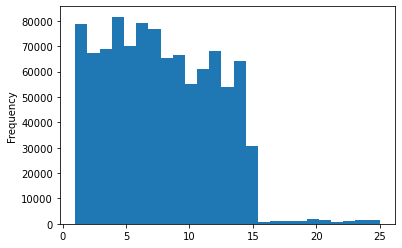

In [28]:
hist = df['prices'].plot.hist(bins = 25)

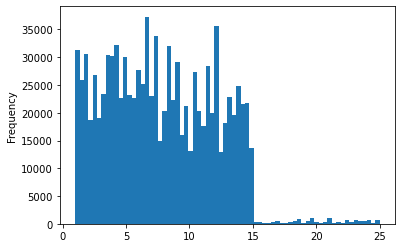

In [40]:
hist=df['prices'].plot.hist(bins = 70)

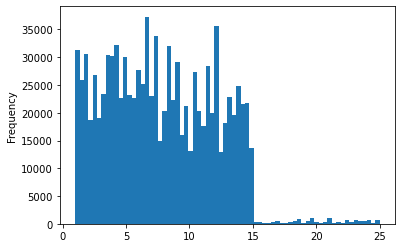

In [41]:
hist.figure

In [42]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 05. sampling

In [43]:
np.random.seed(4)

In [44]:
dev = np.random.rand(len(df)) <= 0.7

In [45]:
dev

array([False,  True, False, ..., False,  True, False])

In [46]:
dev=np.random.rand(len(df))<=0.7

In [47]:
big=df[dev]

In [48]:
small=df[~dev]

In [52]:
df_2=small[['order_dow','prices']]

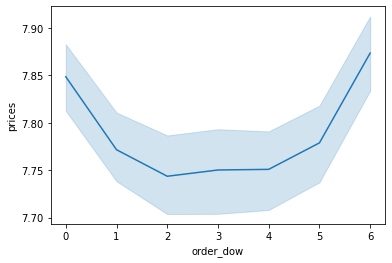

In [53]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [54]:
df_4=big[['order_dow','prices']]

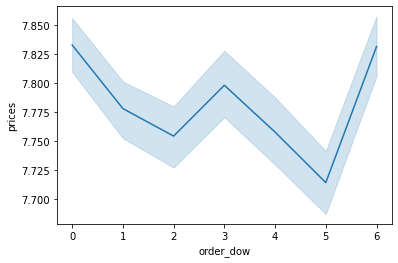

In [55]:
line = sns.lineplot(data = df_4, x = 'order_dow',y = 'prices')